# 第三回：布局格式定方圆

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   #用来正常显示负号

## 一、子图

### 1. 使用 `plt.subplots` 绘制均匀状态下的子图

返回元素分别是画布和子图构成的列表，第一个数字为行，第二个为列，不传入时默认值都为1

`figsize` 参数可以指定整个画布的大小

`sharex` 和 `sharey` 分别表示是否共享横轴和纵轴刻度

`tight_layout` 函数可以调整子图的相对大小使字符不会重叠

<ipython-input-4-746d081f71d2>:11: UserWarning: Glyph 32437 (\N{CJK UNIFIED IDEOGRAPH-7EB5}) missing from current font.
  fig.tight_layout()
<ipython-input-4-746d081f71d2>:11: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from current font.
  fig.tight_layout()
<ipython-input-4-746d081f71d2>:11: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.tight_layout()
<ipython-input-4-746d081f71d2>:11: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  fig.tight_layout()
<ipython-input-4-746d081f71d2>:11: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from current font.
  fig.tight_layout()
<ipython-input-4-746d081f71d2>:11: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.tight_layout()
<ipython-input-4-746d081f71d2>:11: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from current font.
  fig.tight_layout()
<ipython-input-4-746d081

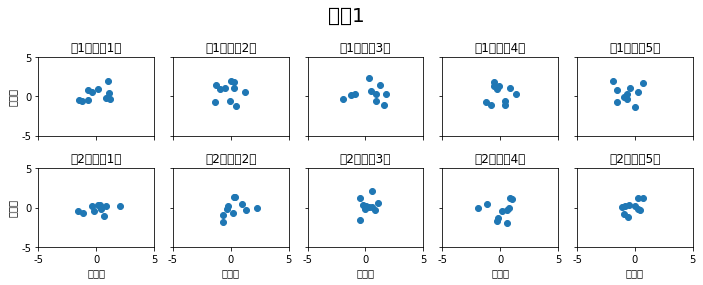

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
fig.suptitle('样例1', size=20)
for i in range(2):
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
        axs[i][j].set_title('第%d行，第%d列'%(i+1,j+1))
        axs[i][j].set_xlim(-5,5)
        axs[i][j].set_ylim(-5,5)
        if i==1: axs[i][j].set_xlabel('横坐标')
        if j==0: axs[i][j].set_ylabel('纵坐标')
fig.tight_layout()

`subplots`是基于OO模式的写法，显式创建一个或多个axes对象，然后在对应的子图对象上进行绘图操作。  
还有种方式是使用`subplot`这样基于pyplot模式的写法，每次在指定位置新建一个子图，并且之后的绘图操作都会指向当前子图，本质上`subplot`也是`Figure.add_subplot`的一种封装。

在调用`subplot`时一般需要传入三位数字，分别代表总行数，总列数，当前子图的index

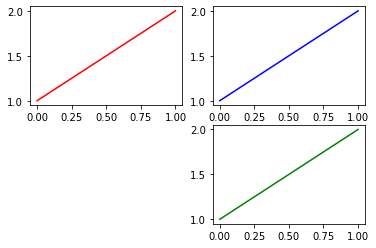

In [5]:
plt.figure()
# 子图1
plt.subplot(2,2,1) 
plt.plot([1,2], 'r')
# 子图2
plt.subplot(2,2,2)
plt.plot([1,2], 'b')
#子图3
plt.subplot(224)  # 当三位数都小于10时，可以省略中间的逗号，这行命令等价于plt.subplot(2,2,4) 
plt.plot([1,2], 'g');

除了常规的直角坐标系，也可以通过`projection`方法创建极坐标系下的图表

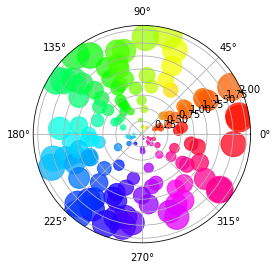

In [6]:
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta


plt.subplot(projection='polar')
plt.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75);

> 练一练  

请思考如何用极坐标系画出类似的玫瑰图
<img src="http://www.hinews.cn/news/pic/003/205/569/00320556959_f01764d0.jpg" width="300" align="bottom" />


### 2. 使用 `GridSpec` 绘制非均匀子图

所谓非均匀包含两层含义，第一是指图的比例大小不同但没有跨行或跨列，第二是指图为跨列或跨行状态

利用 `add_gridspec` 可以指定相对宽度比例 `width_ratios` 和相对高度比例参数 `height_ratios`

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
<ipython-input-7-b3ad0f6bcc8d>:11: UserWarning: Glyph 32437 (\N{CJK UNIFIED IDEOGRAPH-7EB5}) missing from current font.
  fig.tight_layout()
<ipython-input-7-b3ad0f6bcc8d>:11: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from current font.
  fig.tight_layout()
<ipython-input-7-b3ad0f6bcc8d>:11: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.tight_layout()
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
<ipython-input-7-b3ad0f6bcc8d>:11: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  fig.tight_layout()
<ipython-input-7-b3ad0f6bcc8d>:11: UserWarning: Glyph 34892 (\N{CJK UN

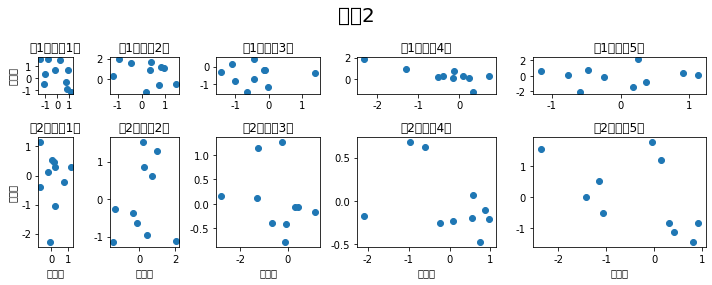

In [7]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[1,2,3,4,5], height_ratios=[1,3])
fig.suptitle('样例2', size=20)
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j])
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title('第%d行，第%d列'%(i+1,j+1))
        if i==1: ax.set_xlabel('横坐标')
        if j==0: ax.set_ylabel('纵坐标')
fig.tight_layout()

在上面的例子中出现了 `spec[i, j]` 的用法，事实上通过切片就可以实现子图的合并而达到跨图的共能

<ipython-input-8-e1465dfef637>:19: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  fig.tight_layout()
<ipython-input-8-e1465dfef637>:19: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from current font.
  fig.tight_layout()


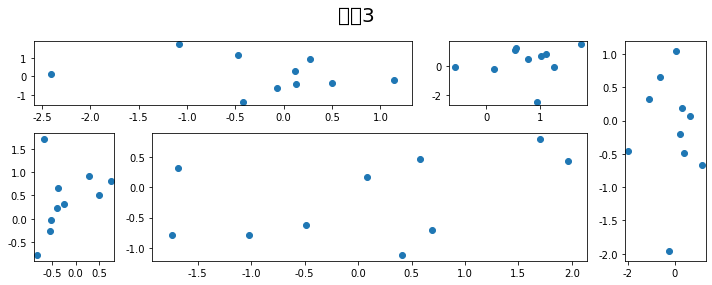

In [8]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=6, width_ratios=[2,2.5,3,1,1.5,2], height_ratios=[1,2])
fig.suptitle('样例3', size=20)
# sub1
ax = fig.add_subplot(spec[0, :3])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub2
ax = fig.add_subplot(spec[0, 3:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub3
ax = fig.add_subplot(spec[:, 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax = fig.add_subplot(spec[1, 0])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub5
ax = fig.add_subplot(spec[1, 1:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
fig.tight_layout()

## 二、子图上的方法

补充介绍一些子图上的方法

常用直线的画法为： `axhline, axvline, axline` （水平、垂直、任意方向）

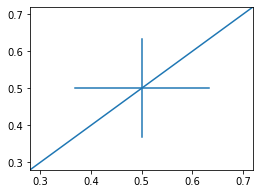

In [9]:
fig, ax = plt.subplots(figsize=(4,3))
ax.axhline(0.5,0.2,0.8)
ax.axvline(0.5,0.2,0.8)
ax.axline([0.3,0.3],[0.7,0.7]);

使用 `grid` 可以加灰色网格

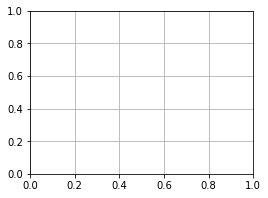

In [10]:
fig, ax = plt.subplots(figsize=(4,3))
ax.grid(True)

使用 `set_xscale` 可以设置坐标轴的规度（指对数坐标等）

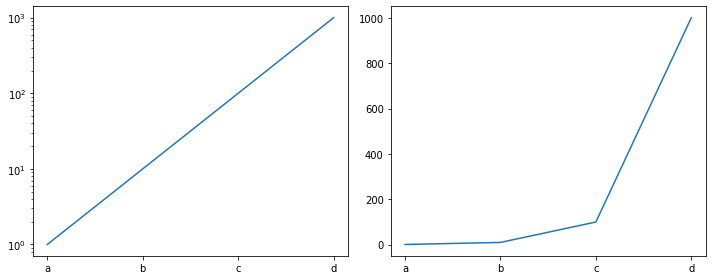

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for j in range(2):
    axs[j].plot(list('abcd'), [10**i for i in range(4)])
    if j==0:
        axs[j].set_yscale('log')
    else:
        pass
fig.tight_layout()

## 思考题

- 墨尔本1981年至1990年的每月温度情况

In [14]:
ex1 = pd.read_csv('../data/layout_ex1.csv')
ex1.head()

,Time,Temperature
0,1981-01,17.712903
1,1981-02,17.678571
2,1981-03,13.500000
3,1981-04,12.356667
4,1981-05,9.490323


请利用数据，画出如下的图：

<img src="https://s1.ax1x.com/2020/11/01/BwvCse.png" width="800" align="bottom" />

-  画出数据的散点图和边际分布

用 `np.random.randn(2, 150)` 生成一组二维数据，使用两种非均匀子图的分割方法，做出该数据对应的散点图和边际分布图

<img src="https://s1.ax1x.com/2020/11/01/B0pEnS.png" width="400" height="400" align="bottom" />

作业1. 墨尔本1981年至1990年的每月温度情况 

In [2]:
import pandas as pd
ex1 = pd.read_csv('../data/layout_ex1.csv')
ex1.head()

,Time,Temperature
0,1981-01,17.712903
1,1981-02,17.678571
2,1981-03,13.500000
3,1981-04,12.356667
4,1981-05,9.490323


<ipython-input-11-f58a0b4f88d6>:24: UserWarning: Glyph 27668 (\N{CJK UNIFIED IDEOGRAPH-6C14}) missing from current font.
  fig.tight_layout()                                               #自适应
<ipython-input-11-f58a0b4f88d6>:24: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from current font.
  fig.tight_layout()                                               #自适应
<ipython-input-11-f58a0b4f88d6>:24: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.tight_layout()                                               #自适应
<ipython-input-11-f58a0b4f88d6>:24: UserWarning: Glyph 22696 (\N{CJK UNIFIED IDEOGRAPH-58A8}) missing from current font.
  fig.tight_layout()                                               #自适应
<ipython-input-11-f58a0b4f88d6>:24: UserWarning: Glyph 23572 (\N{CJK UNIFIED IDEOGRAPH-5C14}) missing from current font.
  fig.tight_layout()                                               #自适应
<ipython-input-11-f58a0b4f88d6>:24:

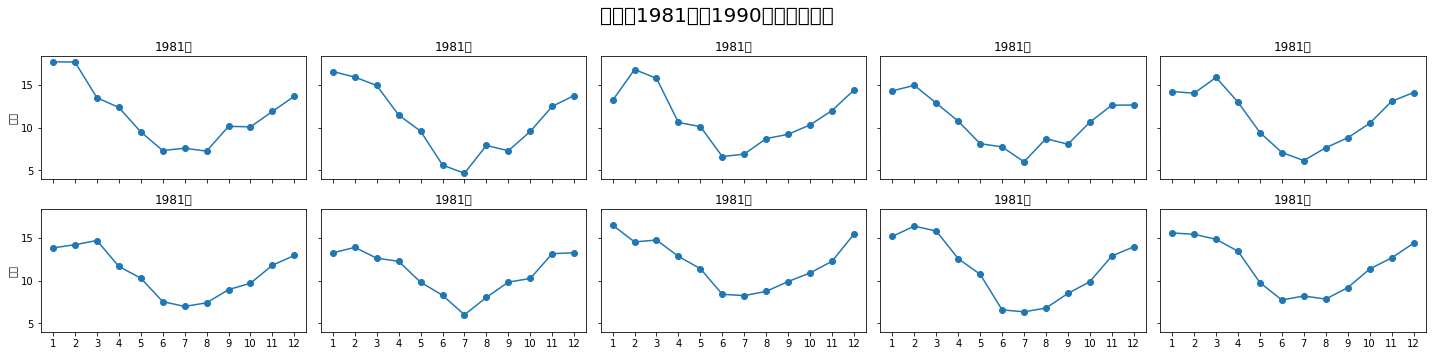

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import pandas as pd
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置字体为SimHei显示中文
plt.rcParams['axes.unicode_minus'] = False #设置正常显示字符

data = pd.read_csv('../data/layout_ex1.csv')

fig, axs = plt.subplots(2,5,figsize=(20,5),sharex=True,sharey=True)
fig.suptitle('Melbourne from 1981 to 1990 monthly tempa',size=20)

index = 0
for i in range(2):
    for j in range(5):
        axs[i][j].plot(np.arange(1,13),data['Temperature'].values[index*12:(index*12+12)],'o-')
        axs[i][j].set_title('%s年'%data['Time'].values[index][:4])
        axs[i][j].xaxis.set_major_locator(MultipleLocator(1)) #把横坐标设置为1的倍数
        axs[i][j].yaxis.set_major_locator(MultipleLocator(5)) #把纵坐标设置为5的倍数
        if(j==0):
            axs[i][j].set_ylabel('气温')
        index += 1

fig.tight_layout()                                               #自适应

2. 画出数据的散点图和边际分布

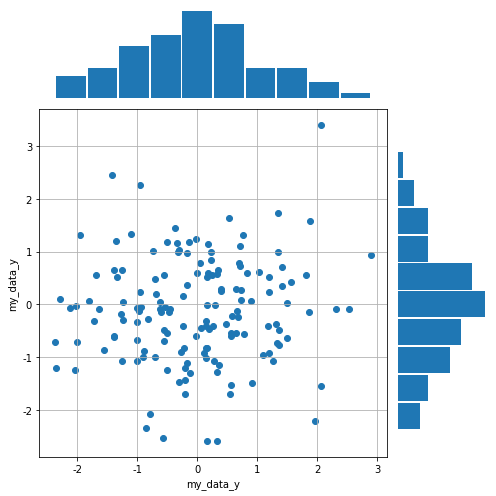

In [12]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randn(2, 150)
fig = plt.figure(figsize=(7,7))
spec = fig.add_gridspec(9,9,width_ratios=np.ones((9)),height_ratios=np.ones((9)))

ax1 = fig.add_subplot(spec[2:9,0:7])
ax2 = fig.add_subplot(spec[0:2,0:7],sharex=ax1) # 与子图1共享x坐标
ax3 = fig.add_subplot(spec[2:9,7:9],sharey=ax1) # 与子图1共享y坐标

#第一个子图
ax1.scatter(data[0],data[1])
ax1.set_ylabel('my_data_y',fontsize=10)
ax1.set_xlabel('my_data_y',fontsize=10)
ax1.grid(True)

#第二个子图
ax2.hist(data[0,:],rwidth=0.94)
# 隐藏x轴标度
ax2.get_xaxis().set_visible(False)
# 隐藏y轴标度
ax2.get_yaxis().set_visible(False)
# 关闭边框
for spine in ax2.spines.values():
    spine.set_visible(False)

#第三个子图
ax3.hist(data[0,:],rwidth=0.94, orientation='horizontal')
# 隐藏x轴标度
ax3.get_xaxis().set_visible(False)
# 隐藏y轴标度
ax3.get_yaxis().set_visible(False)
# 关闭边框
for spine in ax3.spines.values():
    spine.set_visible(False)

fig.tight_layout()